# COURSE: Master statistics and machine learning: Intuition, Math, code
##### COURSE URL: udemy.com/course/statsml_x/?couponCode=202006 
## SECTION: Regression
### VIDEO: Logistic regression
#### TEACHER: Mike X Cohen, sincxpress.com

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

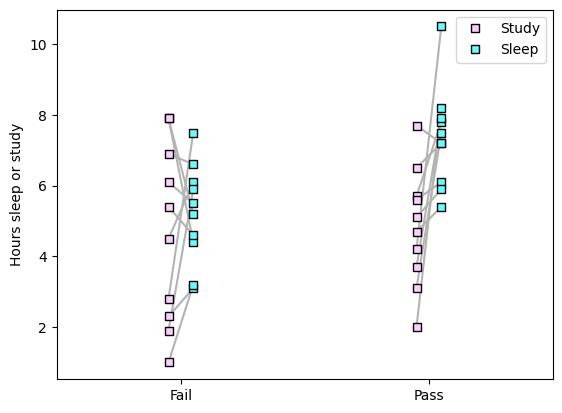

In [3]:
## generate the data

exam_outcome = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1];
study_hours  = [7.9, 7.9, 2.8, 5.4, 6.1, 4.5, 6.9, 2.3, 1.9, 1, 3.1, 5.7, 5.6, 4.7, 4.2, 2, 7.7, 6.5, 5.1, 3.7]
sleep_hours  = [4.4, 5.2, 7.5, 4.6, 5.5, 6.1, 6.6, 3.1, 5.9, 3.2, 7.5, 7.8, 6.1, 5.4, 10.5, 8.2, 7.2, 7.2, 5.9, 7.9]

n = len(exam_outcome)

# and plot
for i in range(n):
    plt.plot([exam_outcome[i]-.05, exam_outcome[i]+.05],[study_hours[i],sleep_hours[i]],color=[.7,.7,.7])

plt.plot(exam_outcome-.05*np.ones(n),study_hours,'ks',markerfacecolor=[1,.8,1],label='Study')
plt.plot(exam_outcome+.05*np.ones(n),sleep_hours,'ks',markerfacecolor=[.39,1,1],label='Sleep')

plt.xticks([0,1],labels=('Fail','Pass'))
plt.xlim([-.5,1.5])
plt.ylabel('Hours sleep or study')
plt.legend()
plt.show()

In [ ]:
## now for the logistic regression

# create a model
logregmodel = LogisticRegression(solver='liblinear')#'newton-cg')#

# create the design matrix
desmat = np.vstack((study_hours,sleep_hours)).T

logregmodel.fit(desmat,np.array(exam_outcome))

print(logregmodel.intercept_)
print(logregmodel.coef_)

In [ ]:
# compute predictions and accuracy

predvals = logregmodel.predict(desmat) # class labels
predvalsP = logregmodel.predict_proba(desmat) # probability values

print(predvals)
print(np.array(exam_outcome))

print(predvalsP)

logregmodel.score(desmat,np.array(exam_outcome))

In [ ]:
# plotting

fig,ax = plt.subplots(1,1,figsize=(5,5))

ax.plot(predvalsP[:,1],'ks')
ax.plot([0,19],[.5,.5],'b--')
ax.plot([9.5,9.5],[0,1],'b--')

ax.set_xticks(np.arange(20))
ax.set_xlabel('Individual')
ax.set_ylabel('p(pass)')
ax.set_xlim([-.5, 19.5])
ax.set_ylim([0,1])
plt.show()